# Лабораторная работа №1. Ансамбли моделей

В рамках лабораторной работы предстоит реализовать один из ансамблевых методов на выбор: бустинг, бэггинг или метод случайных подпространств (RSM).

В качестве базовых алгоритмов рекомендуется использовать библиотечные реализации.

## Задание

1. Выбрать датасет для анализа;
2. Реализовать один из следующих ансамблевых методов:
    * Бустинг;
    * Бэггинг;
    * Метод случайных подпространств (RSM);
3. Для выбранного метода:
    * обучить модель на каждом из датасетов;
    * оценить качество модели с использованием кросс-валидации;
    * замерить время обучения модели;
4. Сравнить результаты с эталонными реализациями из библиотеки [scikit-learn](https://scikit-learn.org/stable/):
    * точность модели;
    * время обучения;
5. Подготовить отчет, включающий:
    * описание выбранного метода;
    * описание датасета;
    * результаты экспериментов;
    * сравнение с эталонными реализациями;
    * выводы.

# 1. Выбрать датасет для анализа;
### В качестве датасета был выбран набор данных для многоклассовой классификации вин

### Таргет: quality

### Ссылка:

https://www.kaggle.com/datasets/yasserh/wine-quality-dataset

In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yasserh/wine-quality-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\klimm\.cache\kagglehub\datasets\yasserh\wine-quality-dataset\versions\1


## Анализ датасета

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [6]:
df = pd.read_csv('WineQT.csv')

In [7]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


Пропусков нет - это хорошо, все признаки имеют численные значения

In [9]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


Отрицательных значений нет, id - неинформативный признак, удалим его

In [10]:
df.drop('Id', axis=1, inplace=True)

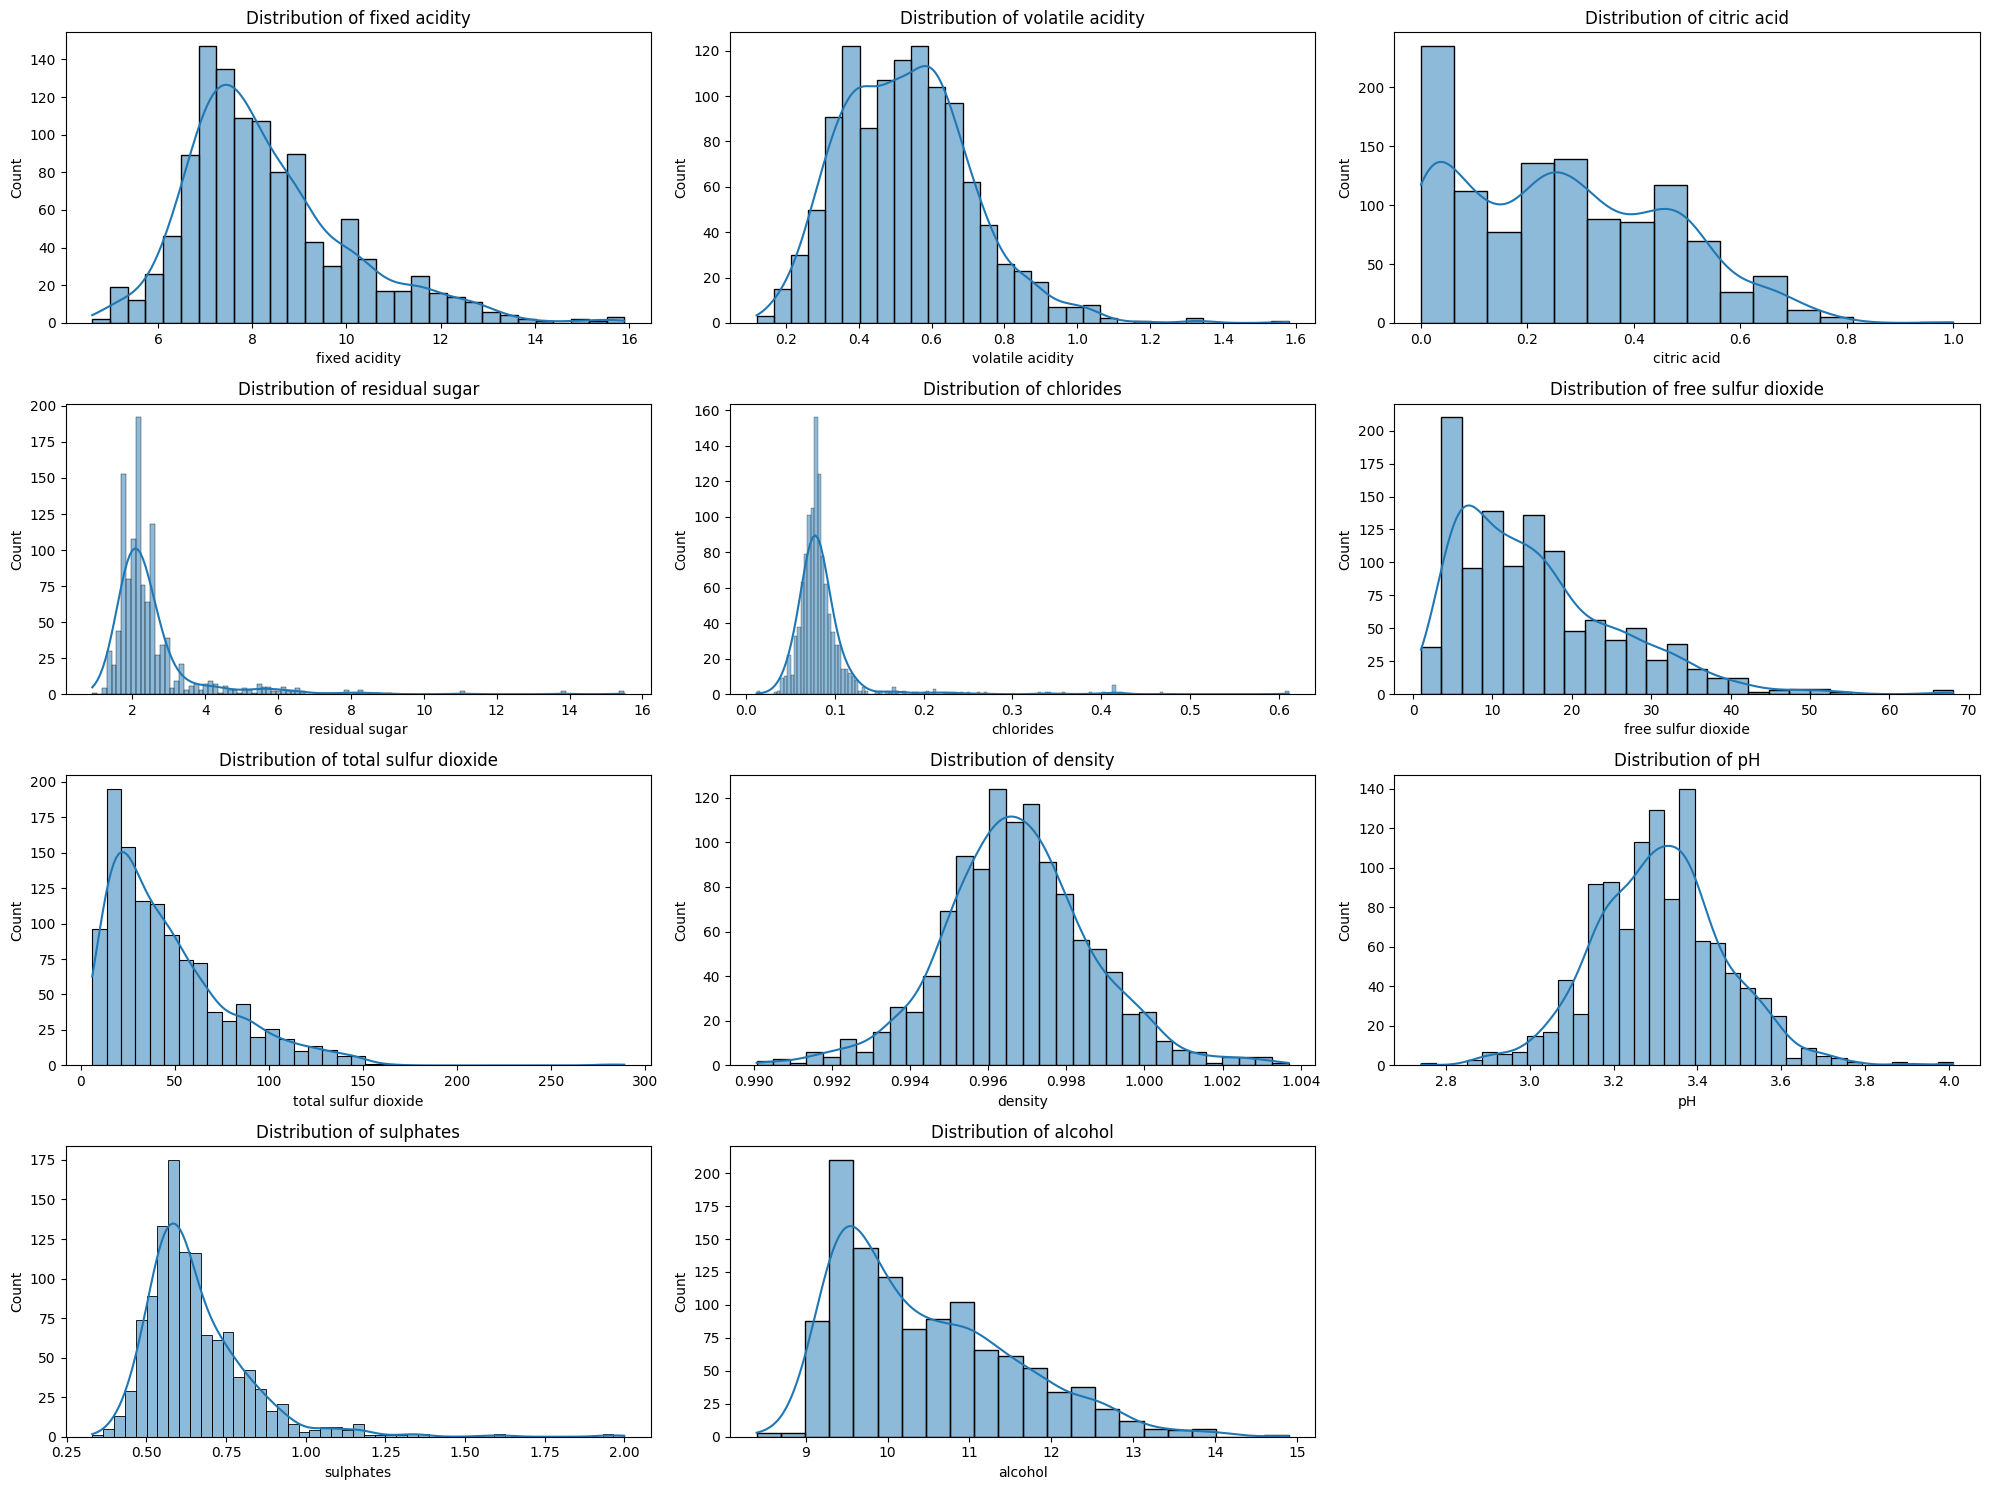

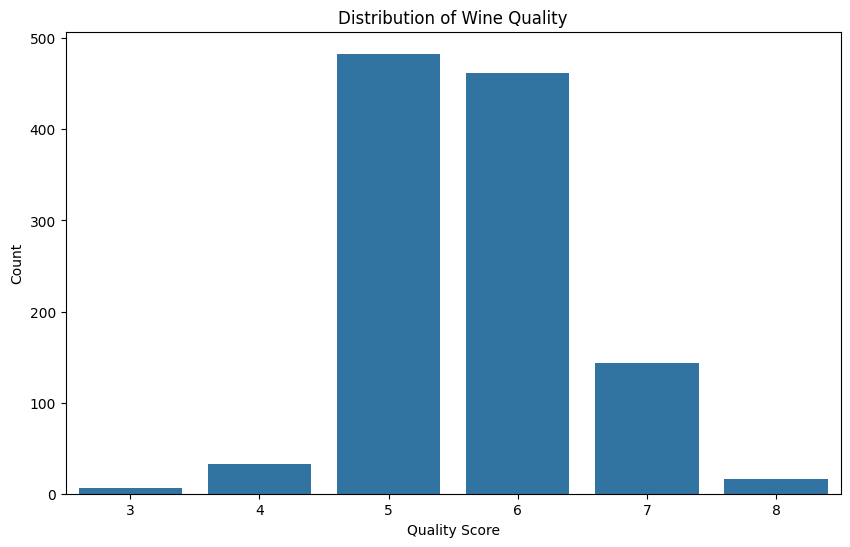

In [11]:
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 
           'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 
           'density', 'pH', 'sulphates', 'alcohol']

target = 'quality'

plt.figure(figsize=(20, 15))
for idx, col in enumerate(features, 1):
    plt.subplot(4, 3, idx)
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x=target)
plt.title('Distribution of Wine Quality')
plt.xlabel('Quality Score')
plt.ylabel('Count')
plt.show()

#### Признаки имеющие нормальное или близкое к нормальное распределению:
1. fixed acidity
2. volatile acidity
3. density
4. pH

#### Правоасимметричные
1. citric acid
2. residual sugar
3. chlorides
4. free sulfur dioxide
5. total sulfur dioxide
6. sulphates
7. alcohol

#### Аномальные пики
1. residual sugar
2. chlorides

#### Таргет
Сильный дисбаланс классов

Проанализируем box plots для правоасимметричных признаков

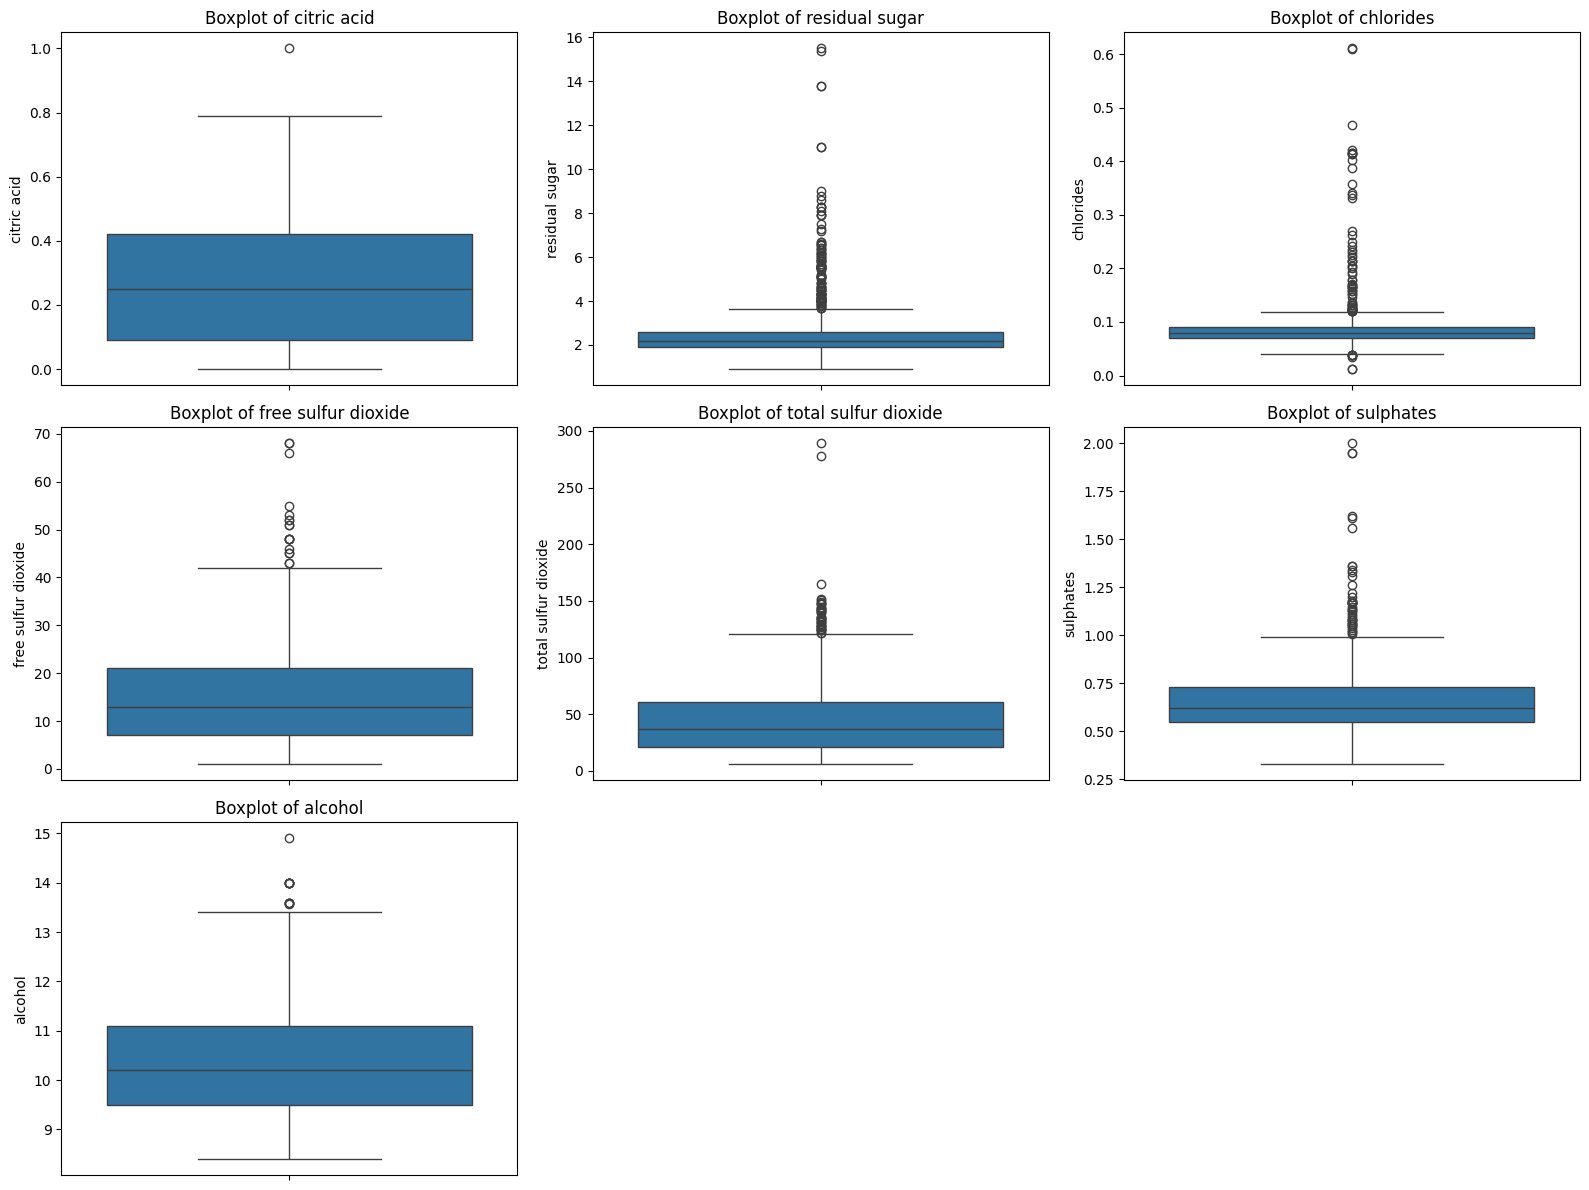

In [12]:
right_skewed = ['citric acid', 'residual sugar', 'chlorides', 
                'free sulfur dioxide', 'total sulfur dioxide', 
                'sulphates', 'alcohol']

n = len(right_skewed)
rows = (n + 2) // 3
cols = 3

plt.figure(figsize=(16, 4 * rows))

for i, col in enumerate(right_skewed, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.show()

#### Вывод
##### residual sugar, chlorides - самые проблемные признаки. Стоит применить RobustScaler
- Экстремальные выбросы
- Очень большой разброс значений


##### Для free sulfur dioxide и total sulfur dioxide - логарифмическое преобразование:
- Умеренное количество выбросов
- Относительно симметричное распределение в основной части данных

##### Для Citric acid и sulphates - StandardScaler с обработкой выбросов:
- Умеренные выбросы
- Относительно компактное распределение основной массы данных

##### Для alcohol достаточно стандартной нормализации:
- Несколько умеренных выбросов
- Относительно нормальное распределение

In [13]:
df_transformed = df.copy()

In [14]:
robust_scaler = preprocessing.RobustScaler()
df_transformed[['residual sugar', 'chlorides']] = robust_scaler.fit_transform(df_transformed[['residual sugar', 'chlorides']])

In [15]:
sulfur_features = ['free sulfur dioxide', 'total sulfur dioxide']
for feature in sulfur_features:
    df_transformed[feature] = np.log1p(df_transformed[feature])

In [16]:
def scale_with_outlier_capping(df, feature, threshold=3):
    data = df[feature].copy()
    scaler = preprocessing.StandardScaler()
    scaled_data = scaler.fit_transform(data.values.reshape(-1, 1))
    
    data[scaled_data.ravel() > threshold] = scaler.inverse_transform([[threshold]])[0][0]
    data[scaled_data.ravel() < -threshold] = scaler.inverse_transform([[-threshold]])[0][0]
    
    return data

df_transformed['citric acid'] = scale_with_outlier_capping(df_transformed, 'citric acid')
df_transformed['sulphates'] = scale_with_outlier_capping(df_transformed, 'sulphates')

In [17]:
scaler = preprocessing.StandardScaler()
df_transformed['alcohol'] = scaler.fit_transform(df_transformed[['alcohol']])

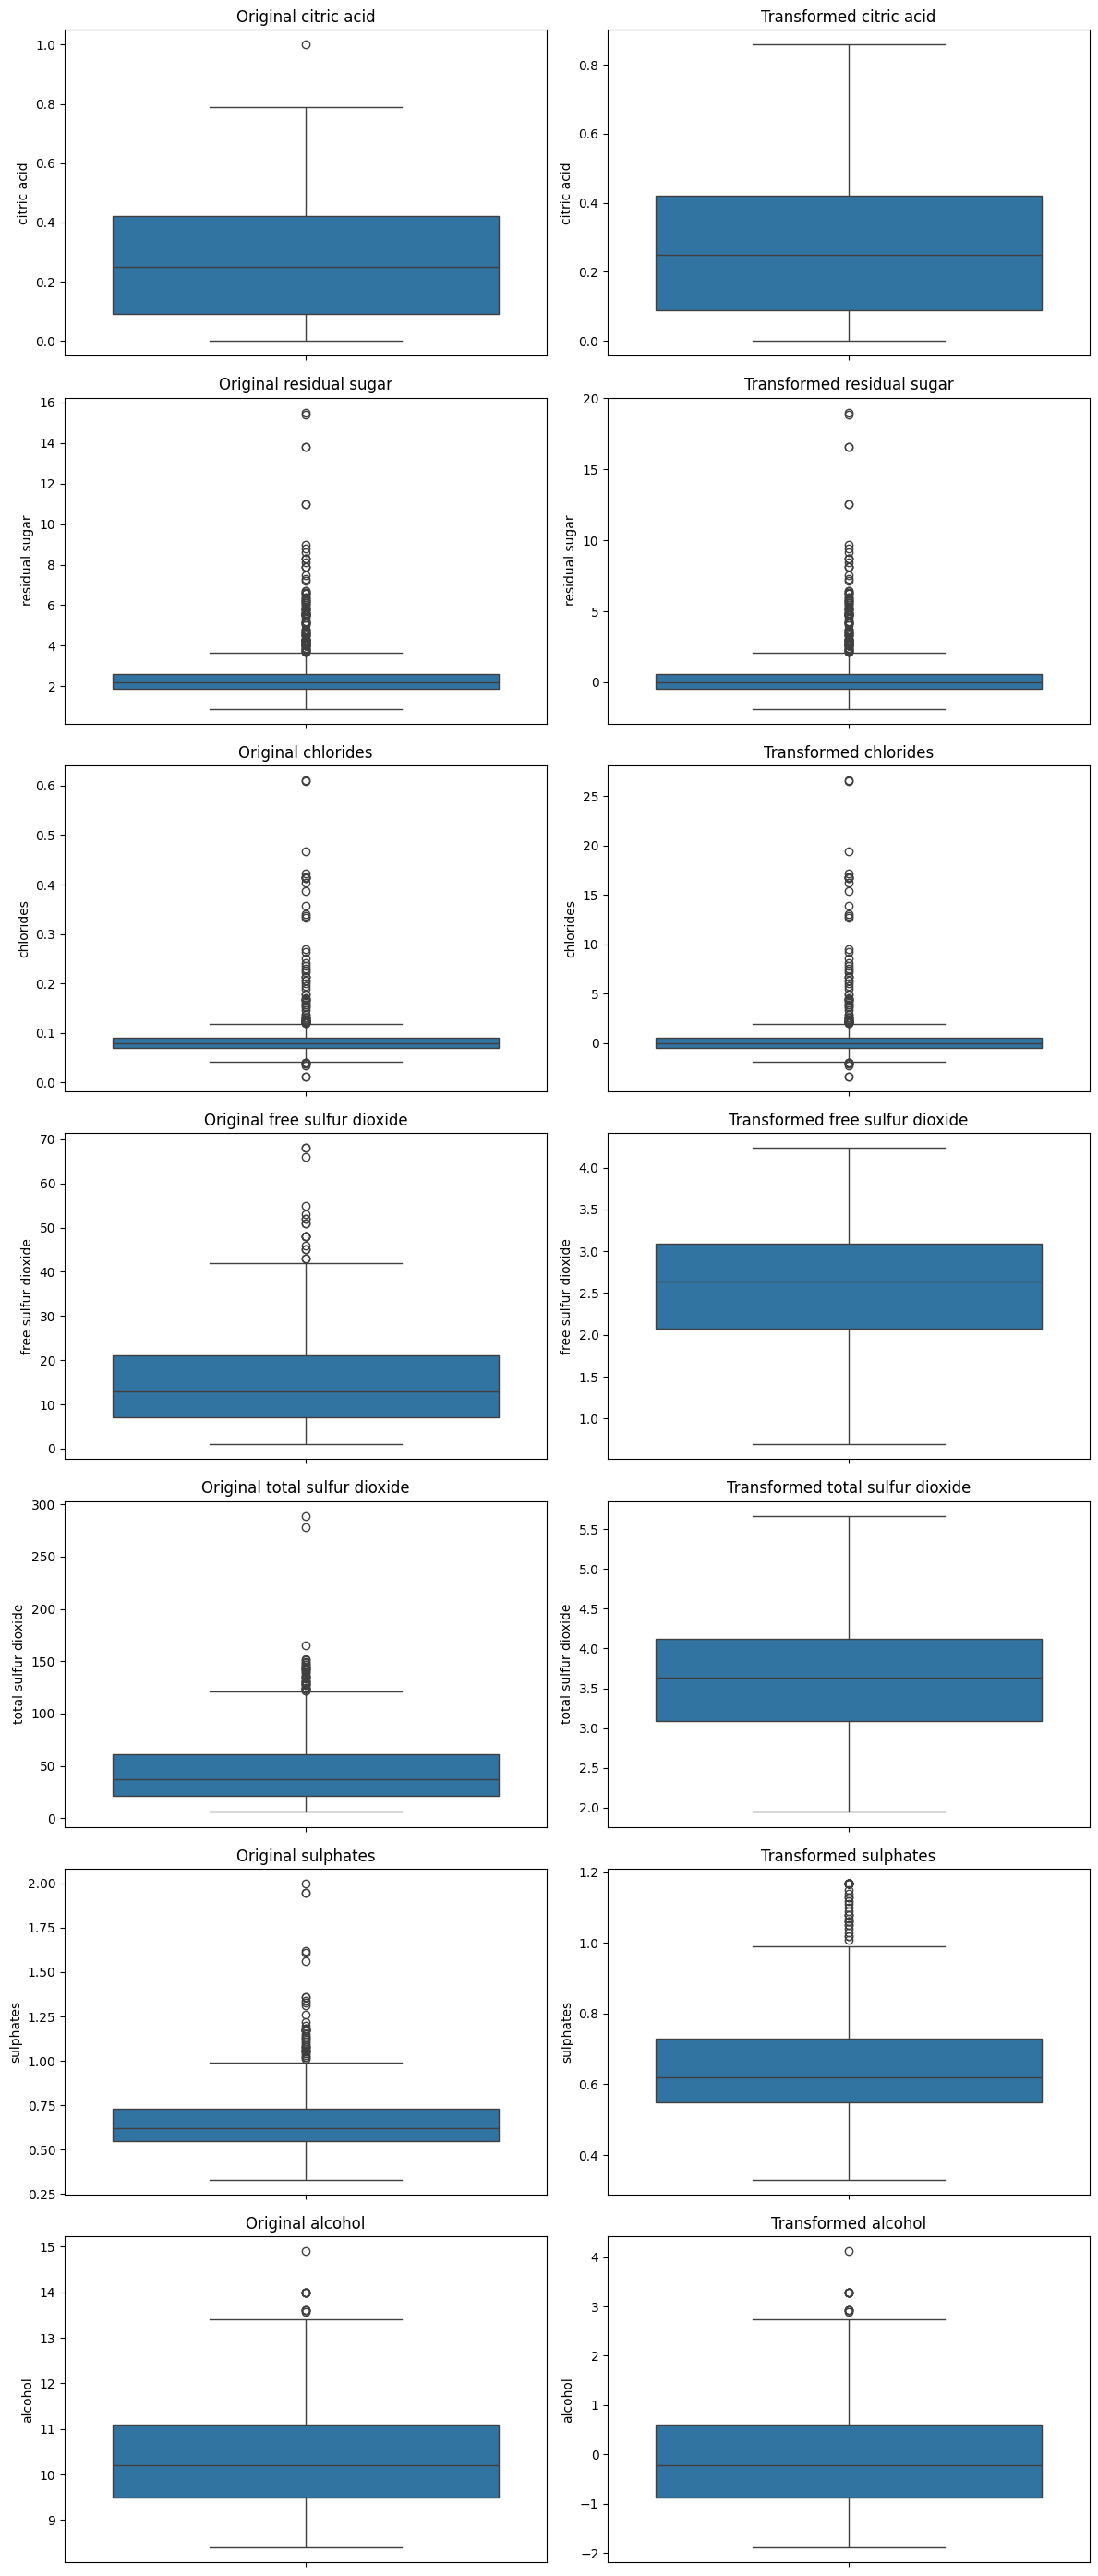

In [18]:
right_skewed = ['citric acid', 'residual sugar', 'chlorides', 
                'free sulfur dioxide', 'total sulfur dioxide', 
                'sulphates', 'alcohol']

n = len(right_skewed)
rows = n
cols = 2

plt.figure(figsize=(12, 4 * rows))

for i, feature in enumerate(right_skewed, 1):
    # Исходные данные
    plt.subplot(rows, cols, 2*i-1)
    sns.boxplot(y=df[feature])
    plt.title(f'Original {feature}')
    
    # Преобразованные данные
    plt.subplot(rows, cols, 2*i)
    sns.boxplot(y=df_transformed[feature])
    plt.title(f'Transformed {feature}')

plt.tight_layout()
plt.show()

##### citric acid:
- Выбросы полностью устранены
- Распределение стало более равномерным

##### free sulfur dioxide и total sulfur dioxide:
- Логарифмическое преобразование значительно улучшило распределение
- Данные стали более компактными и симметричными

##### alcohol:
- Данные центрированы около нуля
- Сохранилось несколько выбросов, но они не критичны

##### Проблемные признаки:
- residual sugar и chlorides: RobustScaler не справился, выбросы стали еще более экстремальными
- sulphates: все еще имеет заметные выбросы после преобразования

##### Дальнейшие эксперименты
Для residual sugar и chlorides можно попробовать применить комбинированный подход: логарифмическое преобразованием, затем scale_with_outlier_capping

Для sulphates ограничить выбросы в 2 сигмы

In [19]:
def log_and_cap(df, feature, threshold=3):
    data = np.log1p(df[feature])
    
    scaler = preprocessing.StandardScaler()
    scaled_data = scaler.fit_transform(data.values.reshape(-1, 1))
    
    data[scaled_data.ravel() > threshold] = scaler.inverse_transform([[threshold]])[0][0]
    data[scaled_data.ravel() < -threshold] = scaler.inverse_transform([[-threshold]])[0][0]
    
    return data

df_transformed['residual sugar'] = log_and_cap(df, 'residual sugar')
df_transformed['chlorides'] = log_and_cap(df, 'chlorides')

In [20]:
df_transformed['sulphates'] = scale_with_outlier_capping(df, 'sulphates', threshold=2.0)

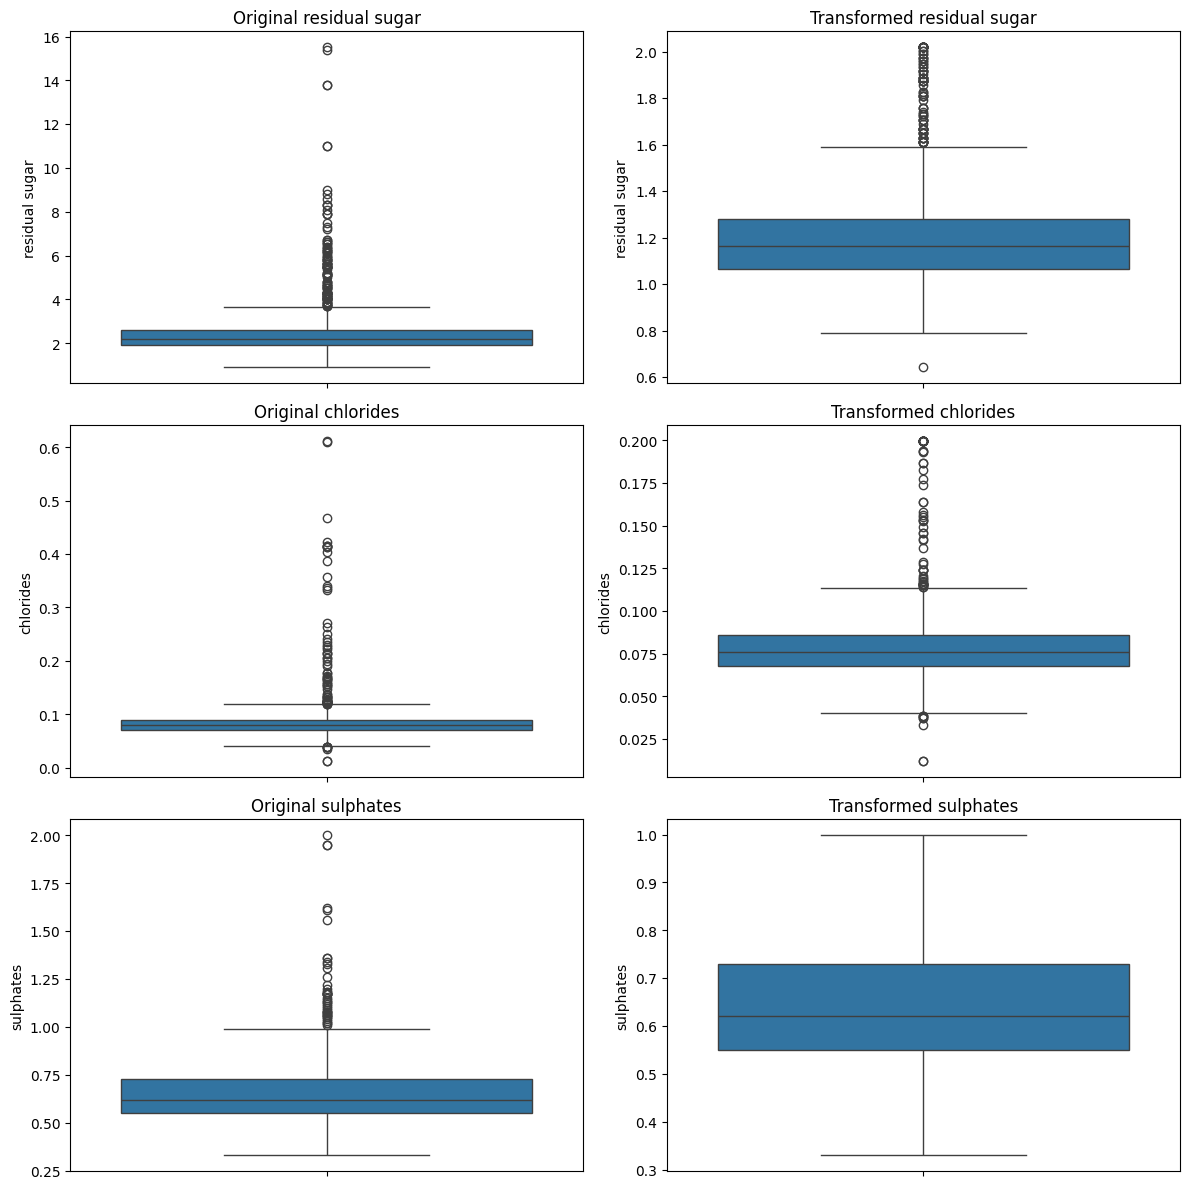

In [21]:
right_skewed = ['residual sugar', 'chlorides', 'sulphates']

n = len(right_skewed)
rows = n
cols = 2

plt.figure(figsize=(12, 4 * rows))

for i, feature in enumerate(right_skewed, 1):
    # Исходные данные
    plt.subplot(rows, cols, 2*i-1)
    sns.boxplot(y=df[feature])
    plt.title(f'Original {feature}')
    
    # Преобразованные данные
    plt.subplot(rows, cols, 2*i)
    sns.boxplot(y=df_transformed[feature])
    plt.title(f'Transformed {feature}')

plt.tight_layout()
plt.show()

У sulphates
- После преобразования выбросы полностью устранены
- Распределение стало компактным и равномерным

Признаки chlorides и residual sugar удалим

In [22]:
df_transformed.drop(columns=['chlorides', 'chlorides'], axis=1, inplace=True)

Проверим также матрицу корреляций

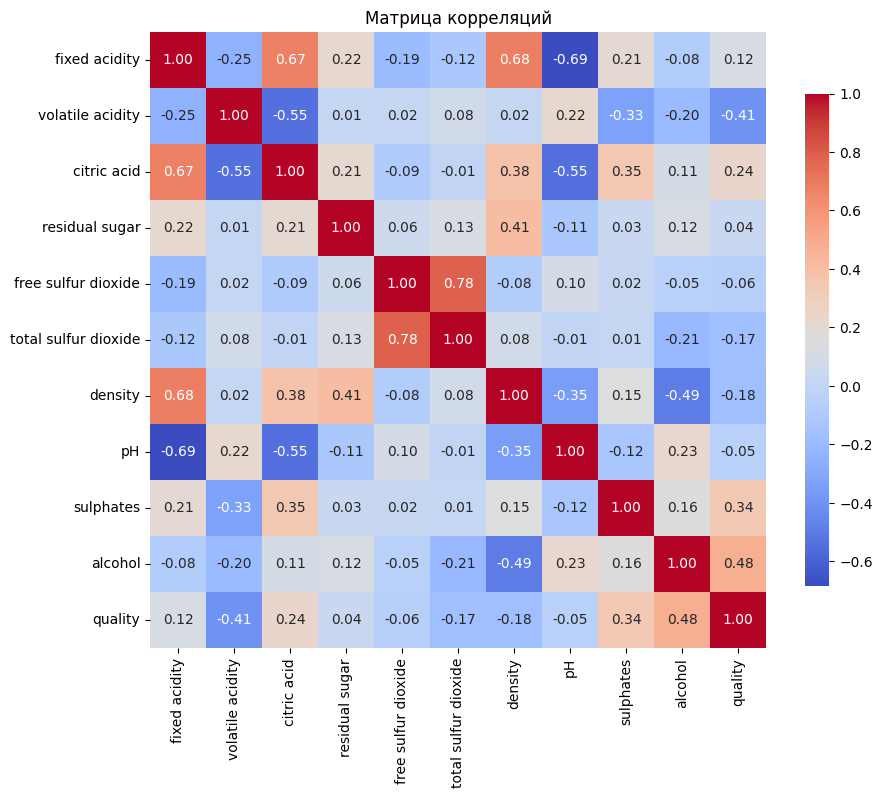

In [23]:
# Построение матрицы корреляций
correlation_matrix = df_transformed.corr()

# Визуализация матрицы корреляций
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Матрица корреляций')
plt.show()

С таргетом сильной корреляции у признаков нет, однако признаки free sulfur dioxide и total sulfur dioxide сильно коррелируют между собой, поэтому удалим total sulfur dioxide для избежания мультиколлинеарности, так как он менее информативен (выше корреляция с таргетом)

In [24]:
df_transformed.drop('total sulfur dioxide', axis=1, inplace=True)

Как помним, в таргете сильный дисбаланс классов, поэтому преобразуем в 3 класса

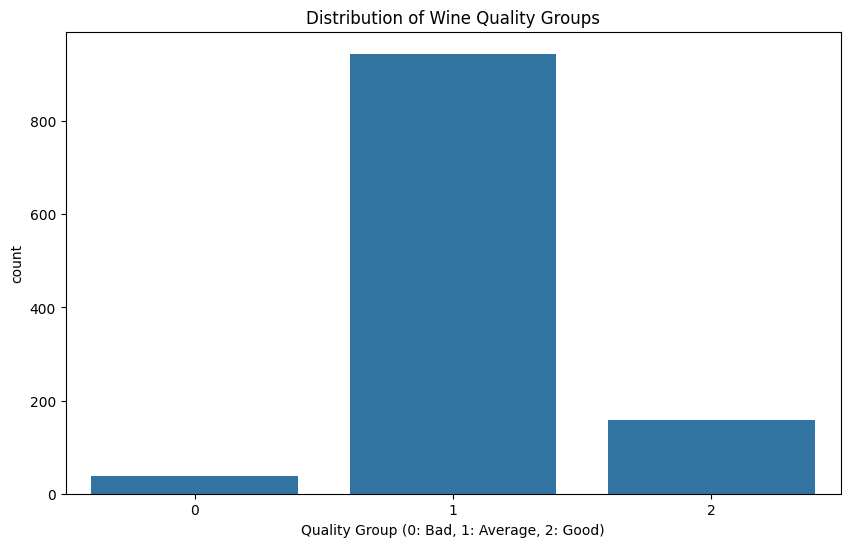

In [25]:
def transform_quality(quality):
    if quality <= 4:
        return 0  # плохое качество
    elif quality <= 6:
        return 1  # среднее качество
    else:
        return 2  # хорошее качество

df_transformed['quality_group'] = df_transformed['quality'].apply(transform_quality)

plt.figure(figsize=(10, 6))
sns.countplot(data=df_transformed, x='quality_group')
plt.title('Distribution of Wine Quality Groups')
plt.xlabel('Quality Group (0: Bad, 1: Average, 2: Good)')
plt.show()

Класс 1 сильно доминирует, синтезируем с помощью SMOTE примеры для миноритарных классов на обучающей выборке, предварительно разделим данные на train и test

In [26]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

ImportError: cannot import name '_safe_tags' from 'sklearn.utils._tags' (c:\Users\klimm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\_tags.py)

In [25]:
features = [col for col in df_transformed.columns if col != 'quality_group']

X = df_transformed[features]
y = df_transformed['quality_group']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

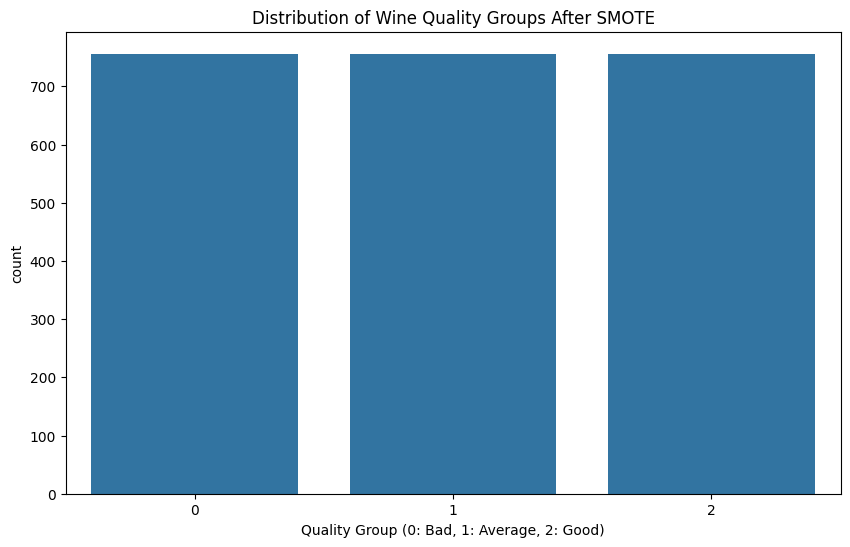

In [30]:
plt.figure(figsize=(10, 6))
sns.countplot(x=y_train_resampled)
plt.title('Distribution of Wine Quality Groups After SMOTE')
plt.xlabel('Quality Group (0: Bad, 1: Average, 2: Good)')
plt.show()

# 2. Реализовать один из следующих ансамблевых методов:
    * Бустинг;
    * Бэггинг;
    * Метод случайных подпространств (RSM);

Выбрал бэггинг

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.base import BaseEstimator, ClassifierMixin
import time

In [40]:
class CustomBagging(BaseEstimator, ClassifierMixin):
    def __init__(self, n_estimators=10, sample_size=1.0, random_state=None):
        self.n_estimators = n_estimators
        self.sample_size = sample_size
        self.random_state = random_state
        self.estimators = []
        
    def fit(self, X, y):
        start_time = time.time()
        n_samples = int(len(X) * self.sample_size)
        n_classes = len(np.unique(y))
        random_threshold = 1.0 / n_classes
        
        if self.random_state is not None:
            np.random.seed(self.random_state)
        
        while len(self.estimators) < self.n_estimators:
            # Создаем бутстрап-выборку
            indices = np.random.randint(0, len(X), n_samples)
            X_bootstrap = X.iloc[indices] if hasattr(X, 'iloc') else X[indices]
            y_bootstrap = y.iloc[indices] if hasattr(y, 'iloc') else y[indices]

            val_indices = np.array([i for i in range(len(X)) if i not in indices])
            if len(val_indices) > 0:
                X_val = X.iloc[val_indices] if hasattr(X, 'iloc') else X[val_indices]
                y_val = y.iloc[val_indices] if hasattr(y, 'iloc') else y[val_indices]
            else:
                val_size = int(0.2 * len(X_bootstrap))
                X_val = X_bootstrap[:val_size]
                y_val = y_bootstrap[:val_size]
                X_bootstrap = X_bootstrap[val_size:]
                y_bootstrap = y_bootstrap[val_size:]
            
            # Обучаем базовый классификатор
            estimator = DecisionTreeClassifier(random_state=self.random_state)
            estimator.fit(X_bootstrap, y_bootstrap)

            val_score = estimator.score(X_val, y_val)
            
            if val_score > random_threshold:
                self.estimators.append(estimator)
     
        self.train_time = time.time() - start_time
        return self
    
    def predict(self, X):
        predictions = np.array([estimator.predict(X) for estimator in self.estimators])
        return np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=predictions)
    
    def get_params(self):
        return {
            'n_estimators': self.n_estimators,
            'sample_size': self.sample_size,
            'random_state': self.random_state
        }
    
    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self

# 3. Для выбранного метода:
    * обучить модель на каждом из датасетов;
    * оценить качество модели с использованием кросс-валидации;
    * замерить время обучения модели;

In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report
import time

In [41]:
n_estimators = 10
random_state = 42

custom_bagging = CustomBagging(n_estimators=n_estimators, random_state=random_state)
custom_start = time.time()
custom_bagging.fit(X_train_resampled, y_train_resampled)
custom_train_time = time.time() - custom_start

cv_scores = cross_val_score(
    custom_bagging, X_train_resampled, y_train_resampled, 
    cv=5, scoring='accuracy'
)

y_pred = custom_bagging.predict(X_test)

print("\nРезультаты собственной реализации бэггинга:")
print(f"Время обучения: {custom_train_time:.4f} секунд")
print(f"Средняя точность по кросс-валидации: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
print(f"Точность на тестовой выборке: {accuracy_score(y_test, y_pred):.4f}")
print("\nОтчет по классификации:")
print(classification_report(y_test, y_pred))


Результаты собственной реализации бэггинга:
Время обучения: 0.0900 секунд
Средняя точность по кросс-валидации: 1.0000 (+/- 0.0000)
Точность на тестовой выборке: 1.0000

Отчет по классификации:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00       189
           2       1.00      1.00      1.00        32

    accuracy                           1.00       229
   macro avg       1.00      1.00      1.00       229
weighted avg       1.00      1.00      1.00       229



# 4. Сравнить результаты с эталонными реализациями из библиотеки [scikit-learn](https://scikit-learn.org/stable/):
    * точность модели;
    * время обучения;


In [42]:
from sklearn.ensemble import BaggingClassifier
import matplotlib.pyplot as plt

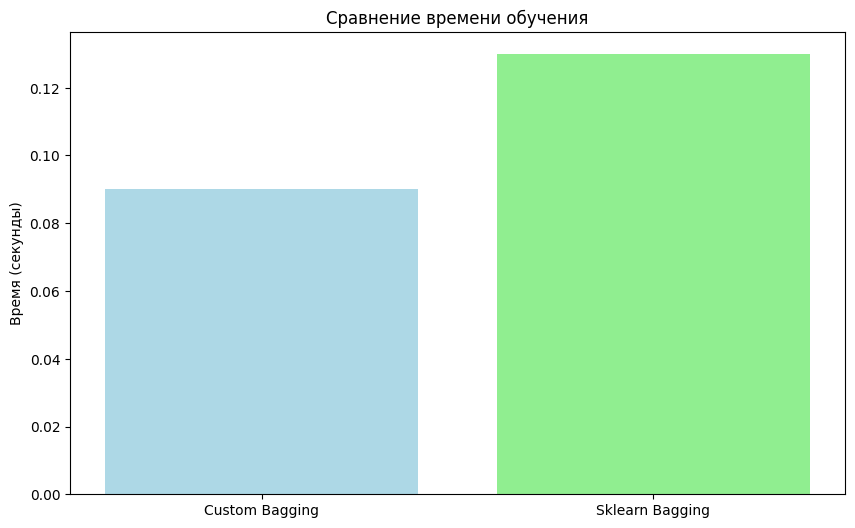

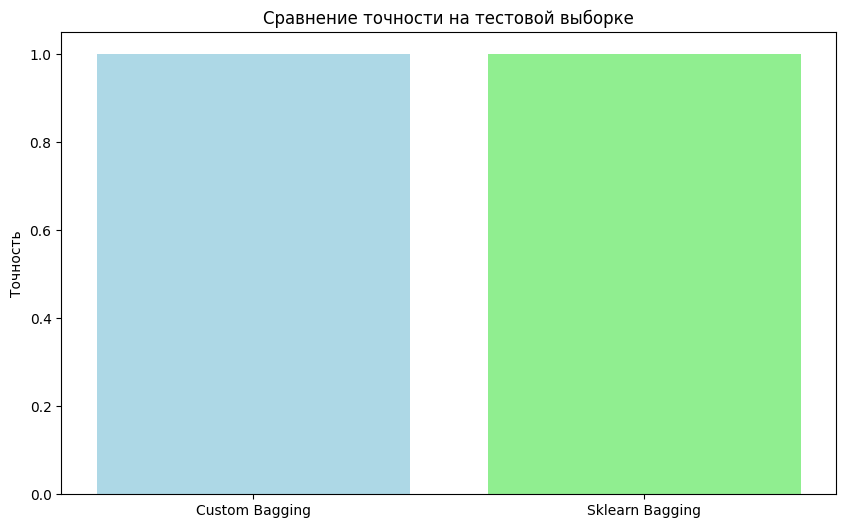


Сравнение результатов:
                         Custom    Sklearn
Время обучения           0.0900     0.1299
Точность                 1.0000     1.0000


In [43]:
# Обучение sklearn бэггинга и замер времени
sklearn_bagging = BaggingClassifier(
    n_estimators=n_estimators,
    random_state=random_state
)
sklearn_start = time.time()
sklearn_bagging.fit(X_train_resampled, y_train_resampled)
sklearn_train_time = time.time() - sklearn_start

# Предсказания sklearn модели
sklearn_pred = sklearn_bagging.predict(X_test)
sklearn_accuracy = accuracy_score(y_test, sklearn_pred)

# Сравнение времени обучения
plt.figure(figsize=(10, 6))
plt.bar(['Custom Bagging', 'Sklearn Bagging'], 
        [custom_train_time, sklearn_train_time],
        color=['lightblue', 'lightgreen'])
plt.title('Сравнение времени обучения')
plt.ylabel('Время (секунды)')
plt.show()

# Сравнение точности
plt.figure(figsize=(10, 6))
plt.bar(['Custom Bagging', 'Sklearn Bagging'], 
        [accuracy_score(y_test, y_pred), sklearn_accuracy],
        color=['lightblue', 'lightgreen'])
plt.title('Сравнение точности на тестовой выборке')
plt.ylabel('Точность')
plt.show()

print("\nСравнение результатов:")
print(f"{'':20} {'Custom':>10} {'Sklearn':>10}")
print(f"{'Время обучения':20} {custom_train_time:10.4f} {sklearn_train_time:10.4f}")
print(f"{'Точность':20} {accuracy_score(y_test, y_pred):10.4f} {sklearn_accuracy:10.4f}")

Отчет приложен в README.md